# Configuring constistent subplots
Peter Kalverla
August 2016

Having spent quite some time on copying, pasting, cutting, numbering and revising paper figures, I finally found a consistent workflow for creating my figures. Paper figures often have multiple subplots, and there are many ways to prepare them. Initially, I would let Latex render the seperate subfigures, but most journals want you to submit the figures as a whole rather than the individual subplots. Ideally, I want to prepare my figures directly in Python, but I ran into some problems with that as well. For example, the figure size would not be consistent, I wanted to insert a picture in one of the subplots, or apply different styles (with seaborn, e.g.) to different subplots. With the approach outlined here, this is no longer a problem.

## Aspect mess up
Initially, I would use the subplots comments to initialize both the figure and axes instances. The default figure size is 8:6, which usually results in nice plots. However, this aspect would be screwed up if there are more axes on one figure. Just doubling the figure size in the subplot direction still results in different aspects. I'll halve the default size in this example. Notice that the width of the lower two subplots is less than the upper one.

<IPython.core.display.Javascript object>


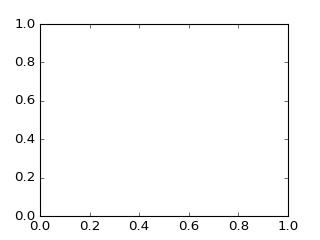

<IPython.core.display.Javascript object>


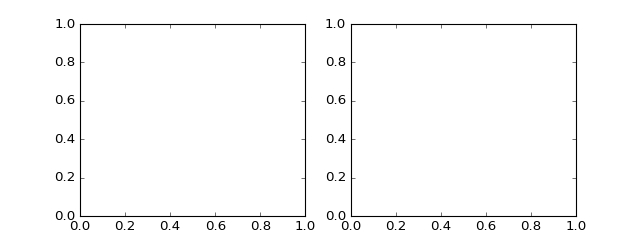

In [11]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax = plt.subplots(figsize=(4,3))
fig, ax = plt.subplots(1,2,figsize=(8,3))

## Style configuration
It is possible to temperarily use styles, for example, xkcd or some styles from the seaborn package. This style should be applied upon creation of the axes instance.

<IPython.core.display.Javascript object>


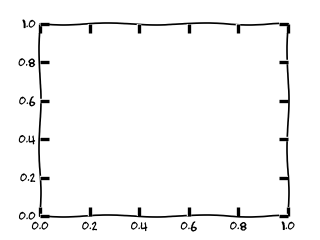

In [19]:
with plt.xkcd():
    plt.subplots(figsize=(4,3))

## Pictures
Sometimes, it'd also be nice to show pictures. For example this handsome volleyball player.

<IPython.core.display.Javascript object>


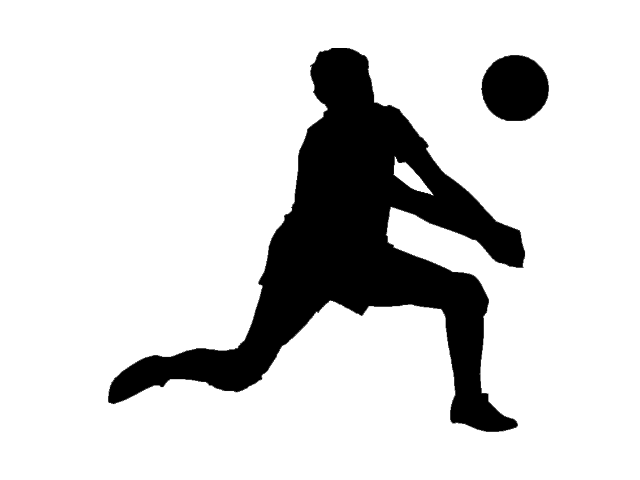

In [29]:
import matplotlib.image as mpimg
img=mpimg.imread('http://static.wixstatic.com/media/4afb41_998a1c7c0835c6eae5e159be3c2cfc07.png_1024')
fig,ax = plt.subplots()
ax.imshow(img)
ax.set_axis_off()

# The new workflow
Normally, I will create the figures, and edit them 1 by 1. Then, to combine them all in one big figure with subplots, the size of the figure shouldn't change too much, otherwise the axis labels don't fit anymore, etc. So I want to be able to make one image and edit it, and also add it to my big figure. Therefore, I'm gonna create the figure and axes instances separately.

<IPython.core.display.Javascript object>


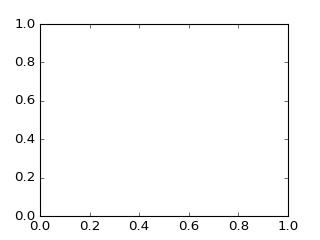

In [28]:
# first create the figure instance
fig = plt.figure(figsize=(4,3))

# then, the axes instance
ax = fig.add_subplot(111)

Here, the 111 determines the number of subplots (1 in the vertical, 1 in the horizontal) and which one we're currently creating (the first one). We could also create a 2x2 raster and edit the right bottom subplot with `fig.add_subplot(2,2,4)`. Now, the key to the new workflow is to create each **axes** instance within a function. In that way, we can call this function to add that particular graph to any figure instance we like:

<IPython.core.display.Javascript object>


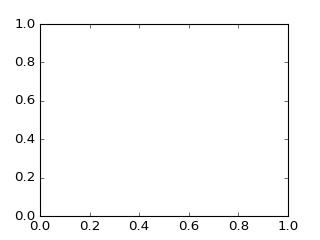

In [31]:
def add_sp_default(fig,pos):
    ax = fig.add_subplot(pos)
    return ax

fig = plt.figure(figsize=(4,3))
ax = add_sp_default(fig,111)

In the above, we first define a function that takes a figure instance and a position as input. The function then adds an axes instance to the figure and returns it to the main script. We then tell python to actually create a figure instance and call our new function to add a subplot to it. This allows us to combine different styles on different subplots.

<IPython.core.display.Javascript object>


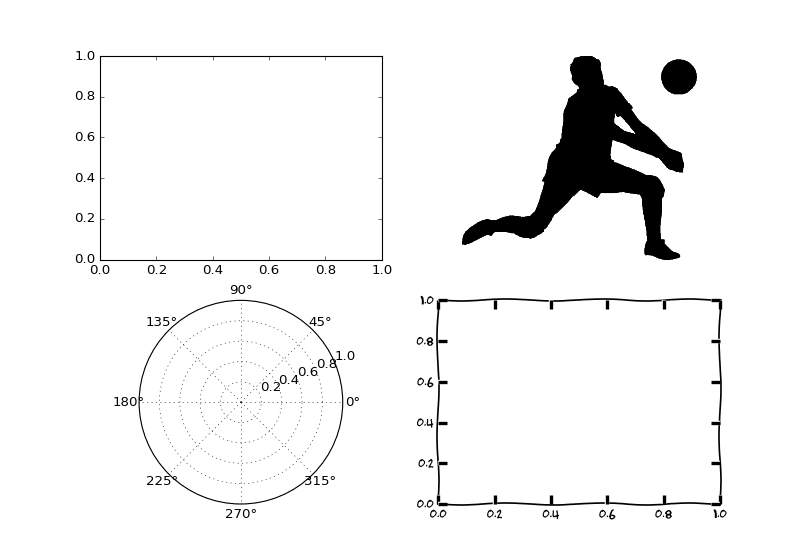

In [35]:
def add_sp_image(fig,pos):
    import matplotlib.image as mpimg
    ax = fig.add_subplot(pos)
    img=mpimg.imread('http://static.wixstatic.com/media/4afb41_998a1c7c0835c6eae5e159be3c2cfc07.png_1024')
    ax.imshow(img)
    ax.set_axis_off()
    return ax

def add_sp_polar(fig,pos):
    ax = fig.add_subplot(pos,projection='polar')
    return ax

def add_sp_xkcd(fig,pos):
    with plt.xkcd():
        ax = fig.add_subplot(pos)
    return ax

fig = plt.figure(figsize=(10,7))
ax1 = add_sp_default(fig,221)
ax2 = add_sp_image(fig,222)
ax3 = add_sp_polar(fig,223)
ax4 = add_sp_xkcd(fig,224)
plt.show()

Note that we have now used a larger fig size to make everything look nice. This takes a bit of playing around with the figsize. As a starting point, just multiply the original figure size with the number of subplots in each direction. Usually, the aspect gets messed up a bit and you can reduce the height of the figure a bit.

# Numbering the axes and reducing whitespace
Now, I'd like to number my subplots. That's quite easy:

<IPython.core.display.Javascript object>


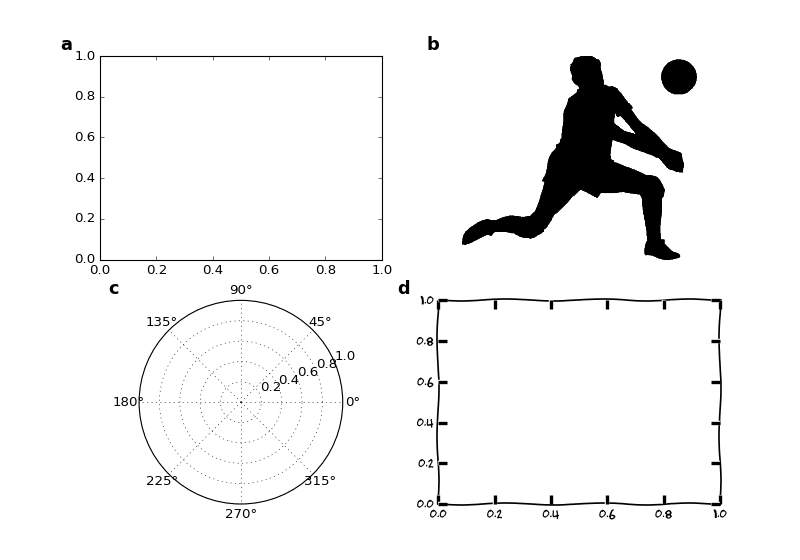

In [41]:
fig = plt.figure(figsize=(10,7))
ax1 = add_sp_default(fig,221)
ax2 = add_sp_image(fig,222)
ax3 = add_sp_polar(fig,223)
ax4 = add_sp_xkcd(fig,224)

labels = 'abcd'
for i,ax in enumerate(fig.axes):
    ax.text(-0.1, 1.1,labels[i], transform=ax.transAxes,
           fontsize=16, fontweight='bold', va='top', ha='right')

It takes a bit of playing around with the exact position of the text, but that won't take too much time. Finally, I'd like to remove some abundant whitespace from the figure:

<IPython.core.display.Javascript object>


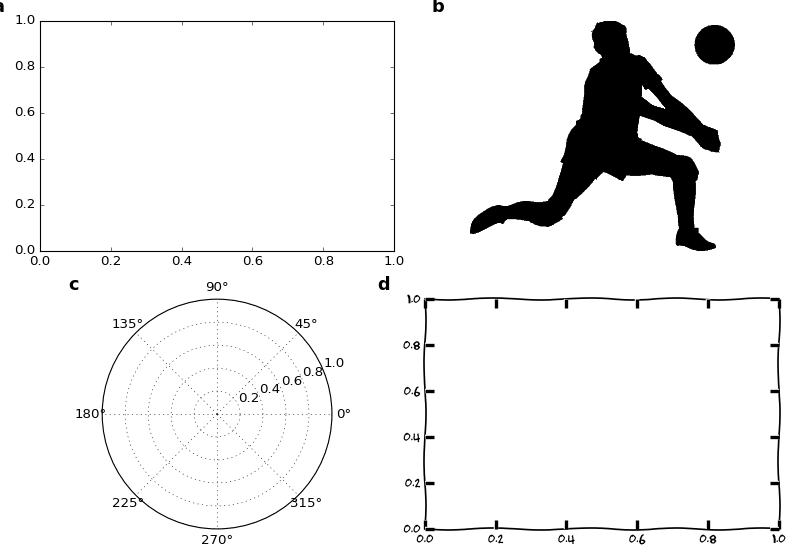

In [51]:
fig = plt.figure(figsize=(10,7))
ax1 = add_sp_default(fig,221)
ax2 = add_sp_image(fig,222)
ax3 = add_sp_polar(fig,223)
ax4 = add_sp_xkcd(fig,224)

labels = 'abcd'
for i,ax in enumerate(fig.axes):
    ax.text(-0.1, 1.1,labels[i], transform=ax.transAxes,
           fontsize=16, fontweight='bold', va='top', ha='right')
    
fig.tight_layout()

Note that my 'a' has been cut off the figure (and the top of the 'b'). That's why it usually takes some time to find a satisfactory location for the labels. I got it reasonably acceptable (not perfect!) by using -0.05 and 1.01 as text coordinates. An alternative would be to use something like `subplots_adjust`. 

In [52]:
plt.close('all')